<a href="https://www.kaggle.com/code/mosesmoncy/bank-note-authenication?scriptVersionId=126872972" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

What is bank note authentication?

This process aims to detect fraudulent notes accurately. A set of images taken from genuine and forged banknote-like specimens is created. Features such as wavelet variance, wavelet skewness, wavelet kurtosis, and image entropy are extracted from the images.

This is a classification project, since the variable to be predicted is binary (fraudulent or legal). The goal is to model the probability that a banknote is fraudulent as its features function using classification models.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
a=pd.read_csv('/kaggle/input/bank-note-csv/BankNote_Authentication.csv')
a

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
# read first five data

a.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
# read last five data

a.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [5]:
a.shape

(1372, 5)

In [6]:
a.describe

<bound method NDFrame.describe of       variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]>

In [7]:
a.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [8]:
a.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

0    762
1    610
Name: class, dtype: int64

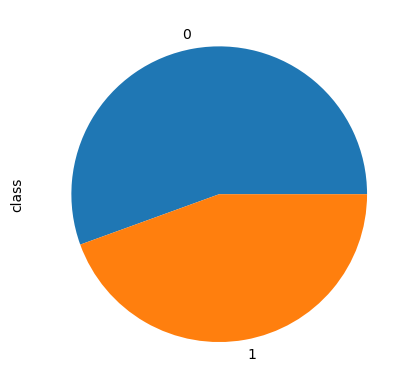

In [9]:
a['class'].value_counts().plot(kind='pie')
a['class'].value_counts()


In [10]:
a.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

<AxesSubplot:xlabel='entropy', ylabel='Count'>

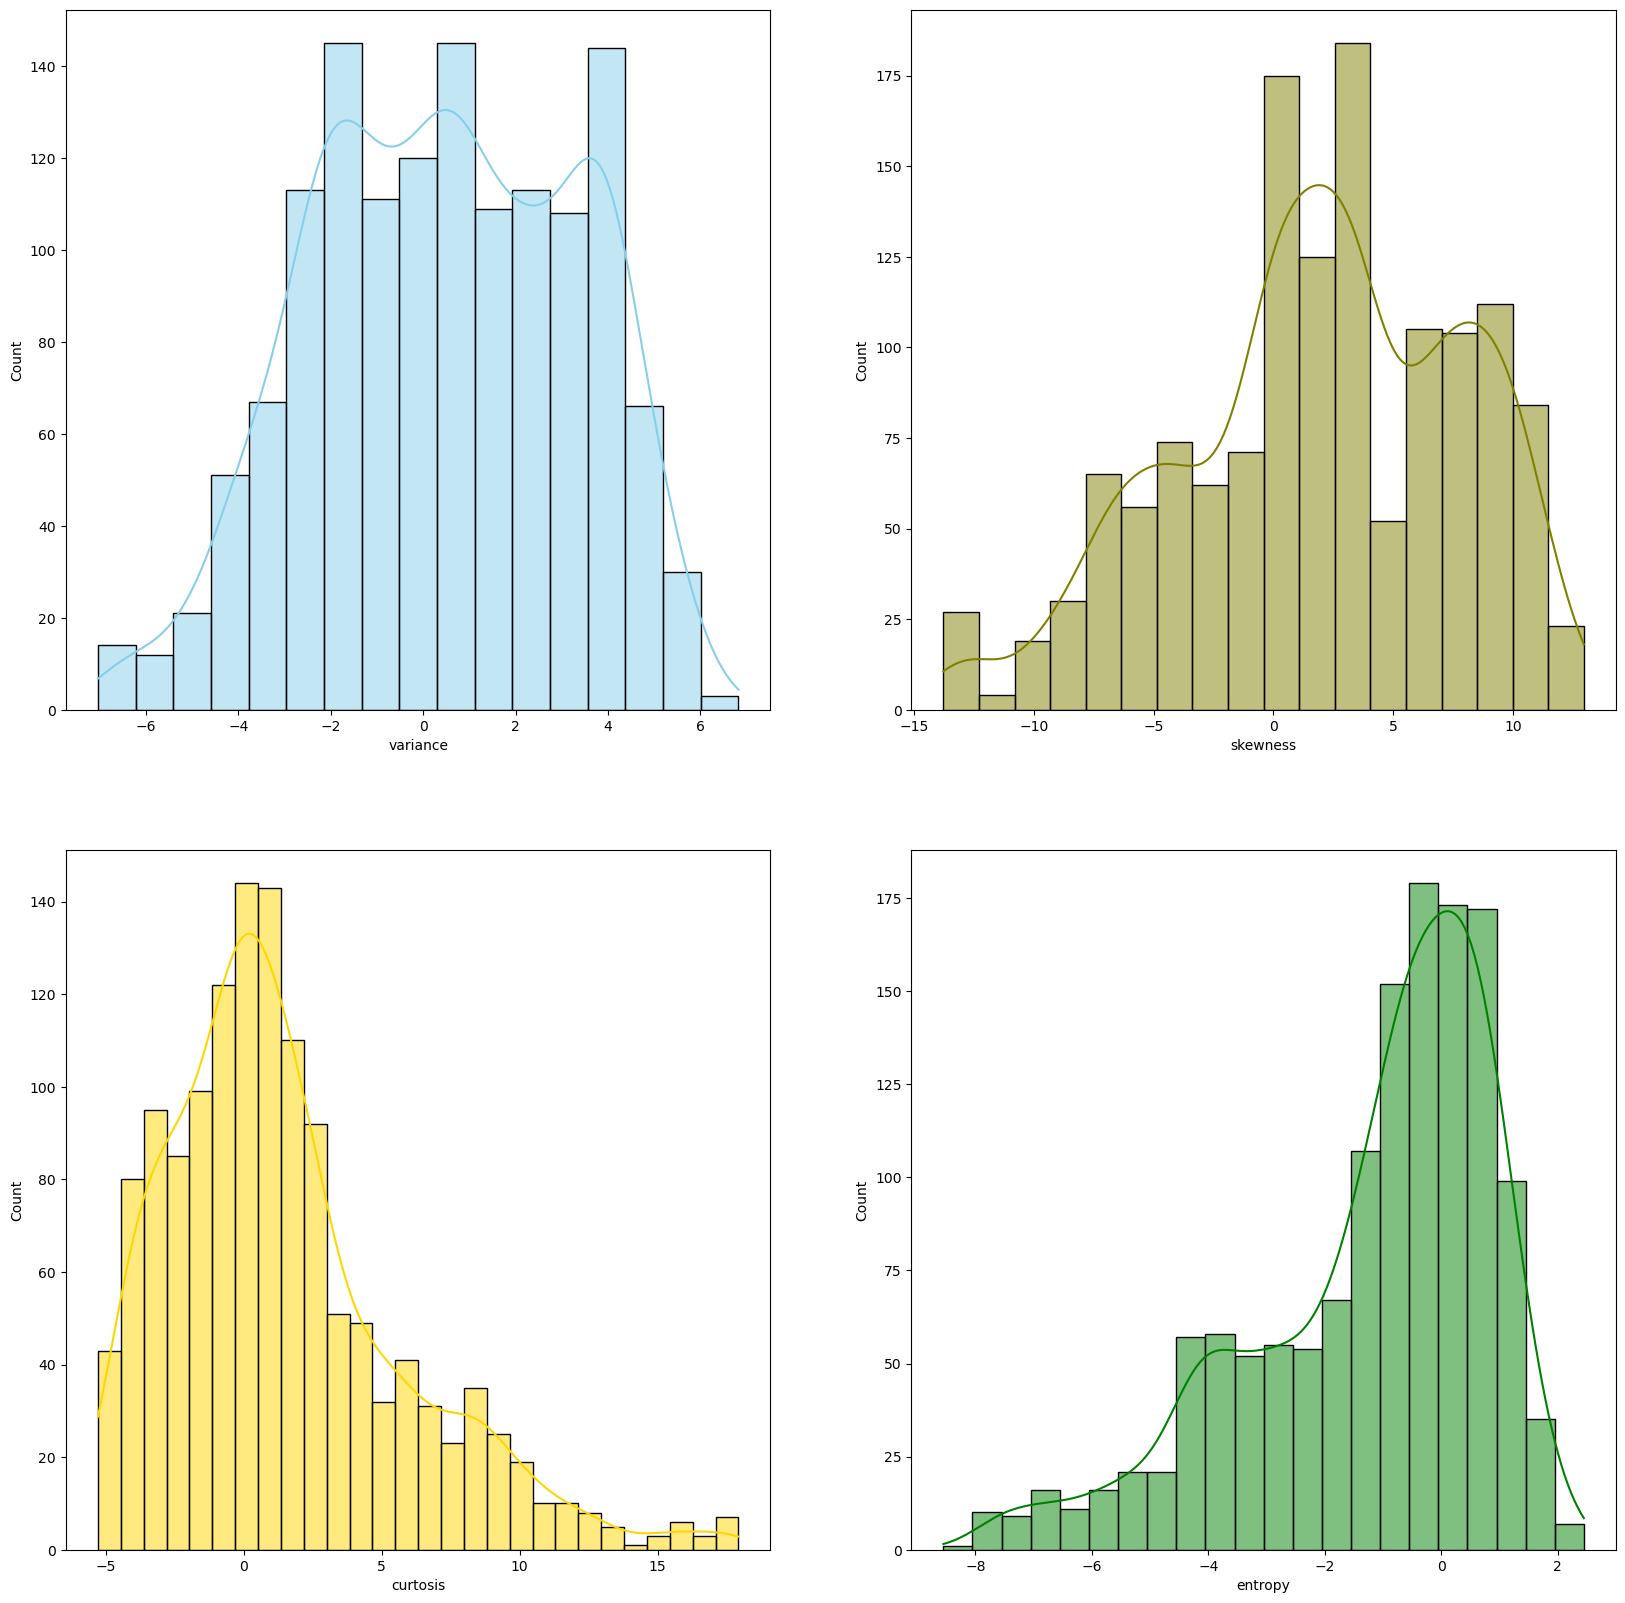

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
sns.histplot(data=a['variance'], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=a['skewness'], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=a['curtosis'], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=a['entropy'], kde=True, color="green", ax=axs[1, 1])


In [12]:
# splitting dataframe a into inputs(x) and output(y)

x=a.drop(['class'],axis=1)
y=a['class']
x

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [13]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [14]:
a.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

<AxesSubplot:xlabel='variance', ylabel='class'>

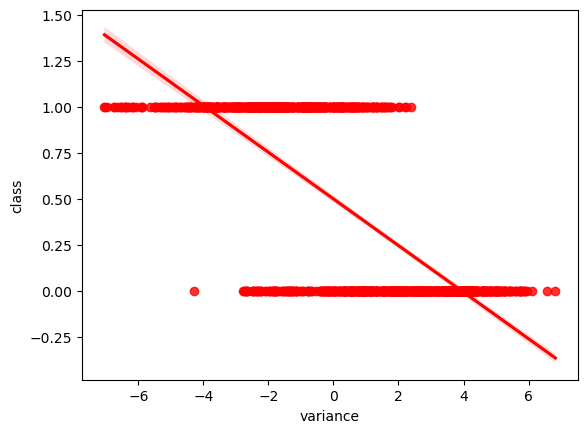

In [15]:
sns.regplot(x=a['variance'],y=y,color='red')

<AxesSubplot:xlabel='skewness', ylabel='class'>

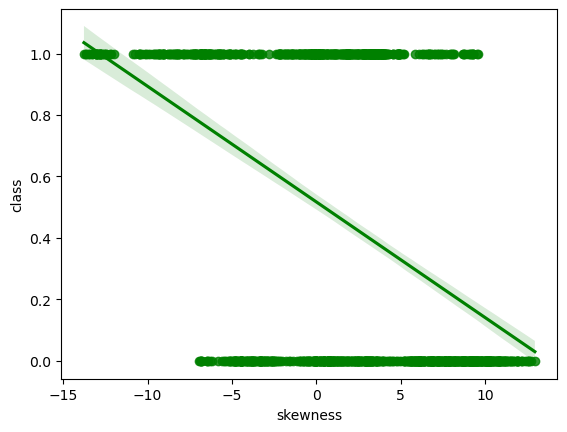

In [16]:
sns.regplot(x=a['skewness'],y=y,color='green')

<AxesSubplot:xlabel='curtosis', ylabel='class'>

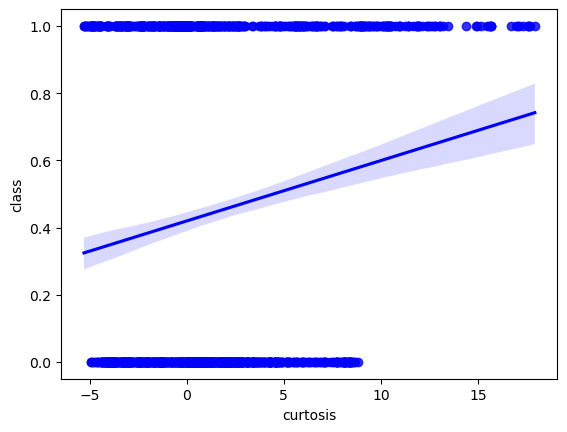

In [17]:
sns.regplot(x=a['curtosis'],y=y,color='blue')

<AxesSubplot:xlabel='entropy', ylabel='class'>

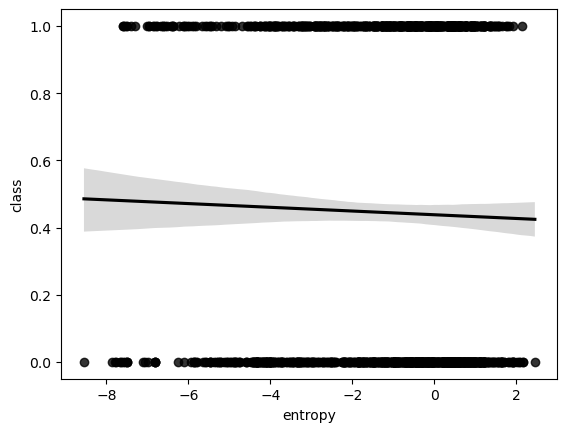

In [18]:
sns.regplot(x=a['entropy'],y=y,color='black')

<AxesSubplot:>

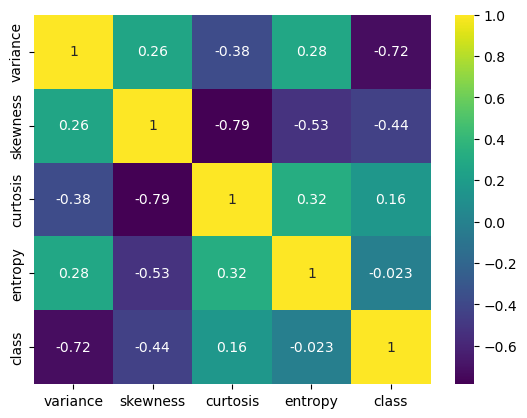

In [19]:
sns.heatmap(a.corr(),annot=True,cmap='viridis')

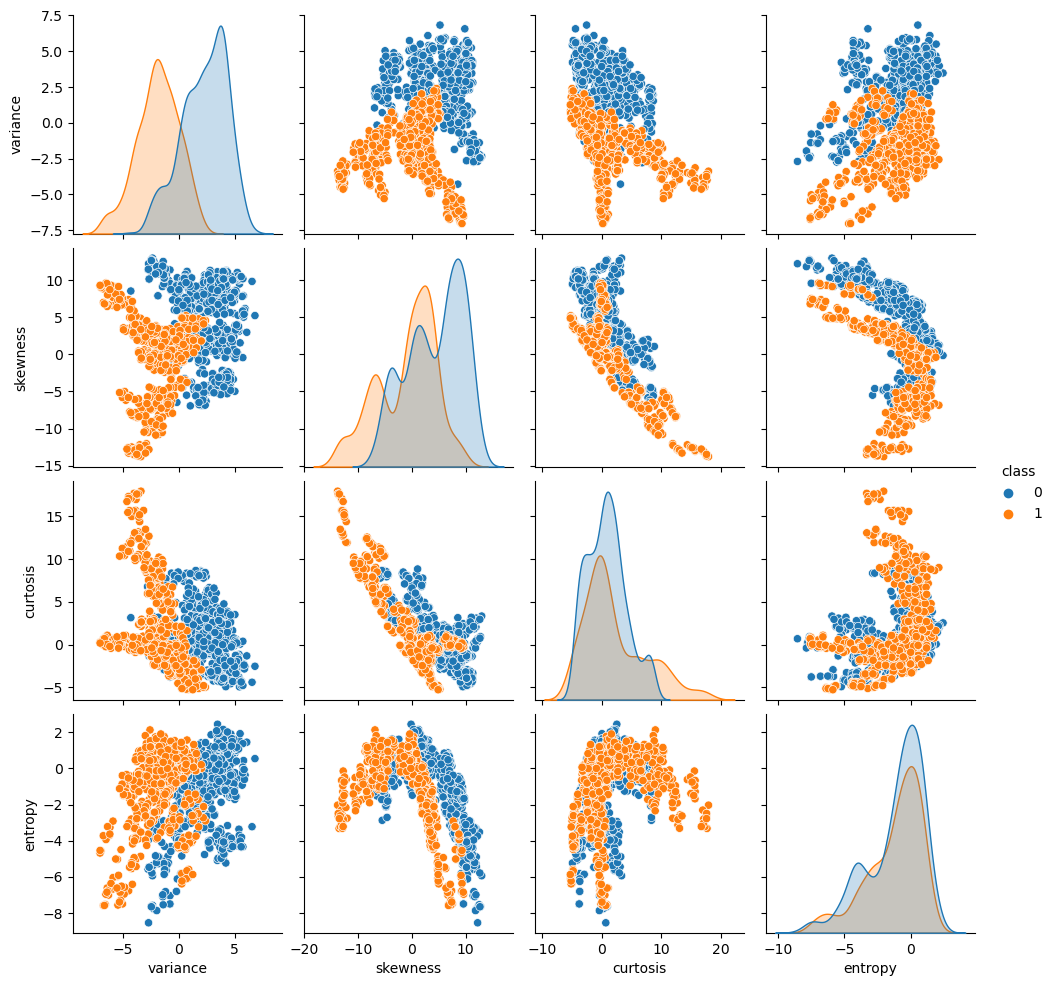

In [20]:
sns.pairplot(a,hue='class');

In [21]:
# Implementing Train Test Split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,variance,skewness,curtosis,entropy
879,-0.568770,1.4174,-1.42520,-1.12460
783,0.473680,3.3605,-4.50640,-4.04310
605,1.065200,8.3682,-1.40040,-1.65090
1253,-4.553100,-12.5854,15.44170,-1.49830
497,-0.048008,-1.6037,8.47560,0.75558
...,...,...,...,...
1095,1.164000,3.9130,-4.55440,-3.86720
1130,-2.291800,-7.2570,7.95970,0.92110
1294,-7.036400,9.2931,0.16594,-4.53960
860,-3.460500,2.6901,0.16165,-1.02240


In [22]:
y_train

879     1
783     1
605     0
1253    1
497     0
       ..
1095    1
1130    1
1294    1
860     1
1126    1
Name: class, Length: 960, dtype: int64

PREPROCESSING BY USING STANDARD SCALAR

In [23]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [24]:
# Here we implement 5 classification models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model1=KNeighborsClassifier(n_neighbors=9,weights='uniform')
model2=GaussianNB()
model3=SVC()
model4=DecisionTreeClassifier(criterion='entropy')
model5=RandomForestClassifier(n_estimators=100)

modellist=[model1,model2,model3,model4,model5]

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

for i in modellist:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('the classification details of model',i,'is below')
    print('the confusion matrix of ',i,'is')
    print( confusion_matrix(y_test,y_pred))
    print('accuracy score of',i,'is')
    print(accuracy_score(y_test,y_pred))
    print('the classification report of',i,'is')
    print(classification_report(y_test,y_pred))


the classification details of model KNeighborsClassifier(n_neighbors=9) is below
the confusion matrix of  KNeighborsClassifier(n_neighbors=9) is
[[229   0]
 [  0 183]]
accuracy score of KNeighborsClassifier(n_neighbors=9) is
1.0
the classification report of KNeighborsClassifier(n_neighbors=9) is
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

the classification details of model GaussianNB() is below
the confusion matrix of  GaussianNB() is
[[203  26]
 [ 43 140]]
accuracy score of GaussianNB() is
0.8325242718446602
the classification report of GaussianNB() is
              precision    recall  f1-score   support

           0       0.83      0.89      0.85       229
           1       0.84      0.77      0.80    

KNeighborsClassifier(n_neighbors=9) and Support Vector Classifier has an accuracy score of 100%

In [26]:
a.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

<AxesSubplot:xlabel='class', ylabel='entropy'>

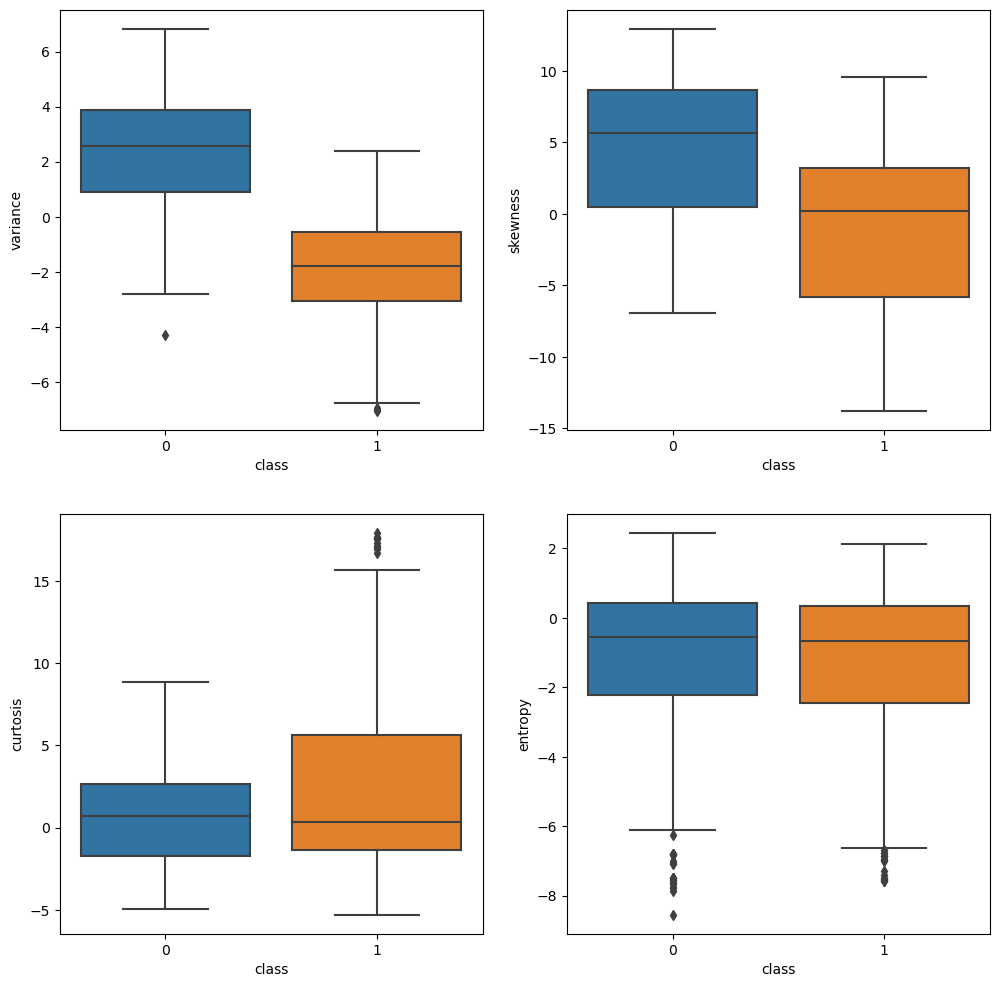

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.boxplot(x=a["class"], y=a["variance"], ax=axs[0, 0])
sns.boxplot(x=a["class"], y=a["skewness"], ax=axs[0, 1])
sns.boxplot(x=a["class"], y=a["curtosis"], ax=axs[1, 0])
sns.boxplot(x=a["class"], y=a["entropy"], ax=axs[1, 1])


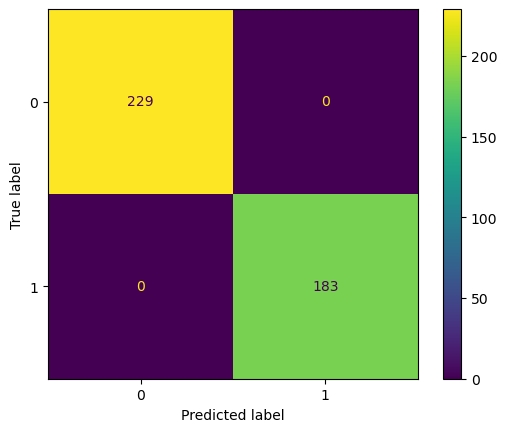

In [28]:
# to plot the confusin matrix

from sklearn.metrics._plot.confusion_matrix  import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred) 
cm=['0','1']   # we should place the class labels according to the data set
cmd=ConfusionMatrixDisplay(result,display_labels=cm)
cmd.plot()